In [6]:
from graphviz import Digraph, Graph

In [7]:
def trace(root, graph):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()

  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in graph[v]:
        if (v, child) not in edges:
          edges.add((child, v))
        build(child)

  build(root)
  return nodes, edges


def draw_dot(root, graph, is_directed=False):
  if is_directed:
    dot = Digraph(format="svg", engine="sfdp")
  else:
    dot = Graph(format="svg", engine="sfdp")
  nodes, edges = trace(root, graph)
  for n in nodes:
    dot.node(n)
  for n1, n2 in edges:
    dot.edge(n1, n2)
  return dot

![alt text](image.png)

In [8]:
test = {
  "a": ["b", "f"],
  "b": ["a", "c", "g"],
  "c": ["b", "d", "g", "l"],
  "d": ["c", "e", "k"],
  "e": ["d", "f"],
  "f": ["a", "e"],
  "g": ["b", "c", "h", "l"],
  "h": ["g", "i"],
  "i": ["h", "j", "k"],
  "j": ["i", "k"],
  "k": ["d", "i", "j", "l"],
  "l": ["c", "g", "k"],
}

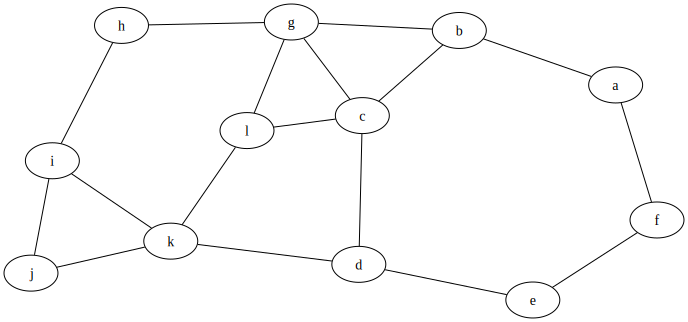

In [10]:
draw_dot("a", test, False)